In [ ]:
# Essential libraries
import os
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
!git clone https://github.com/lugan113/TXL-PBC_Dataset.git

Cloning into 'TXL-PBC_Dataset'...
remote: Enumerating objects: 4313, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 4313 (delta 7), reused 0 (delta 0), pack-reused 4296 (from 1)
Receiving objects: 100% (4313/4313), 89.39 MiB | 11.63 MiB/s, done.
Resolving deltas: 100% (27/27), done.


In [ ]:
!ls TXL-PBC_Dataset

 automate_annotation.py   dataset_statistical_analysis.py   README.md
 baseline_model.py	  example.png			    train.py
 data_integration.py	  LICENSE.txt			    TXL-PBC
 dataset_splits.py	 'model _evaluation.py'


In [ ]:
!ls TXL-PBC_Dataset/TXL-PBC


BCCD_selection.xlsx  images			     metadata_file.xlsx
classes.txt	     labels
data.yaml	     manual_annotation_protocol.pdf


In [ ]:
import os

base_path = 'TXL-PBC_Dataset/TXL-PBC/images'

# List all subfolders inside images (train/val/test)
for split in os.listdir(base_path):
    split_path = os.path.join(base_path, split)
    if os.path.isdir(split_path):
        count = len([f for f in os.listdir(split_path) if f.endswith('.png') or f.endswith('.jpg')])
        print(f"{split}: {count} images")


train: 882 images
val: 252 images
test: 126 images


In [ ]:
with open('TXL-PBC_Dataset/TXL-PBC/classes.txt') as f:
    classes = f.read().splitlines()
print("Classes:", classes)


Classes: ['0 White Blood Cell (WBC)', '1 Red Blood Cell (RBC)', '2 Platelet']


In [ ]:
import os

train_path = 'TXL-PBC_Dataset/TXL-PBC/images/train'
train_images = [f for f in os.listdir(train_path) if f.endswith('.png') or f.endswith('.jpg')]
train_images.sort()  # sort alphabetically

print("First 10 training images:")
print(train_images[:10])


First 10 training images:
['002c1600f18359869647c3f9ec77f637.png', '00565b1186cd5783a39283d119429a10.png', '00949b16d4c85292be8840fc5b9251d1.png', '00fab69fff485b4f92f284d2a581d35d.png', '0179dac540375efba9d323b19216af7a.png', '0243909c29df5f76919fdbef062c52cc.png', '02b1c70149135b8588ca2dd356daa72e.png', '02b573cee92b5ddab0cd0d456a354761.png', '0324a25b7edc5744b0581c12d75314fb.png', '03471375cf64546caa09b9ef962f2f0d.png']


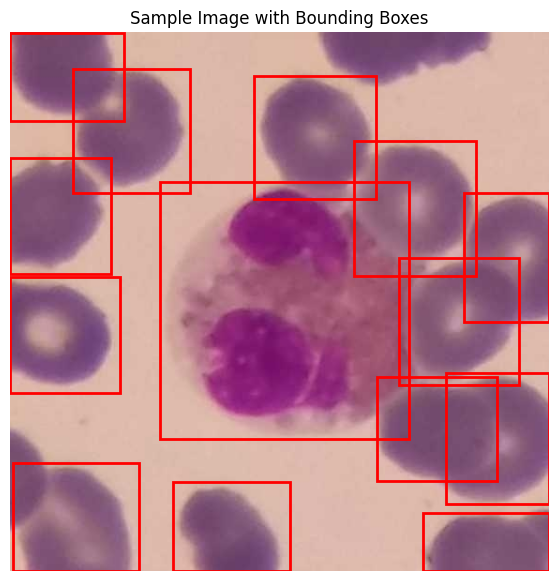

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Use first image from the training set
img_name = '002c1600f18359869647c3f9ec77f637.png'
img_path = os.path.join('TXL-PBC_Dataset/TXL-PBC/images/train', img_name)
lbl_path = os.path.join('TXL-PBC_Dataset/TXL-PBC/labels/train', img_name.replace('.png','.txt'))

# Load image
img = Image.open(img_path)
w, h = img.size

# Plot image
fig, ax = plt.subplots(1, figsize=(7,7))
ax.imshow(img)

# Overlay YOLO bounding boxes
with open(lbl_path, 'r') as f:
    for line in f.readlines():
        cls, xc, yc, bw, bh = map(float, line.split())
        x1 = (xc - bw/2) * w
        y1 = (yc - bh/2) * h
        rect = patches.Rectangle((x1, y1), bw*w, bh*h, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

plt.title("Sample Image with Bounding Boxes")
plt.axis('off')
plt.show()


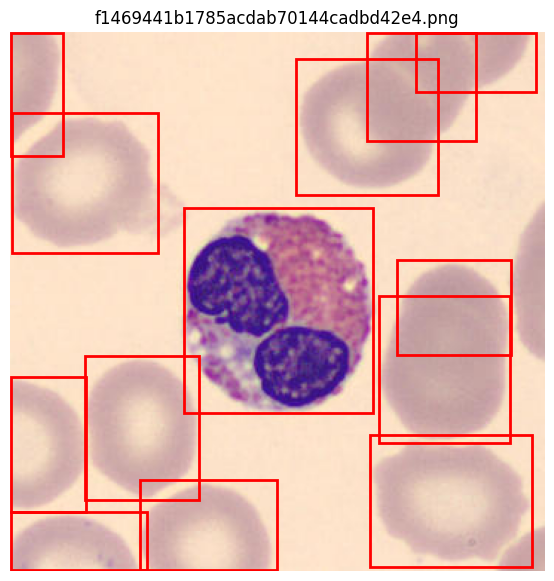

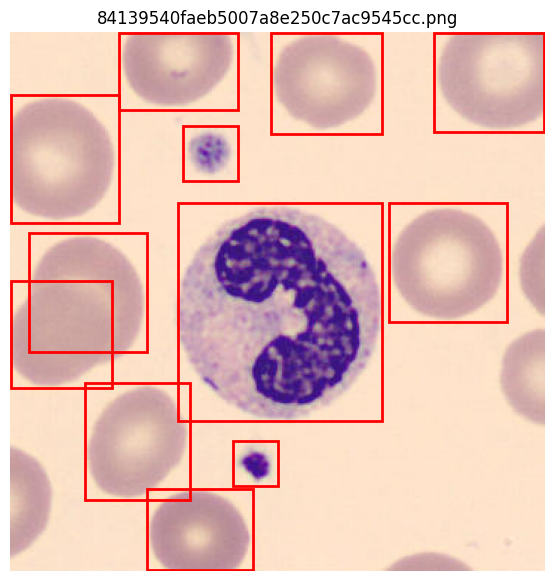

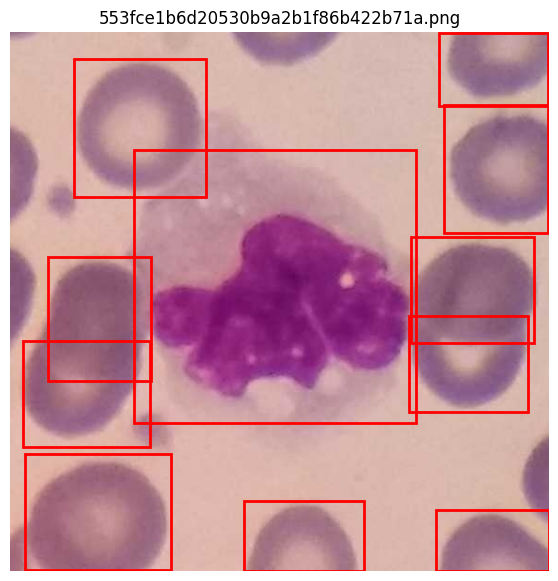

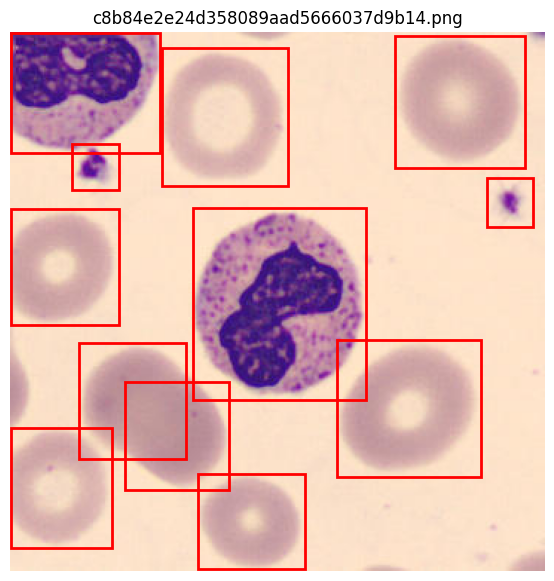

In [ ]:
import random

train_path = 'TXL-PBC_Dataset/TXL-PBC/images/train'
train_images = [f for f in os.listdir(train_path) if f.endswith('.png') or f.endswith('.jpg')]
train_images.sort()

for _ in range(4):
    img_name = random.choice(train_images)
    img_path = os.path.join(train_path, img_name)
    lbl_path = os.path.join('TXL-PBC_Dataset/TXL-PBC/labels/train', img_name.replace('.png','.txt'))

    img = Image.open(img_path)
    w, h = img.size

    fig, ax = plt.subplots(1, figsize=(7,7))
    ax.imshow(img)

    with open(lbl_path, 'r') as f:
        for line in f.readlines():
            cls, xc, yc, bw, bh = map(float, line.split())
            x1 = (xc - bw/2) * w
            y1 = (yc - bh/2) * h
            rect = patches.Rectangle((x1, y1), bw*w, bh*h, linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)

    plt.title(img_name)
    plt.axis('off')
    plt.show()


In [ ]:
from collections import Counter

train_lbl_path = 'TXL-PBC_Dataset/TXL-PBC/labels/train'
class_counts = Counter()

for lbl_file in os.listdir(train_lbl_path):
    if lbl_file.endswith('.txt'):
        with open(os.path.join(train_lbl_path, lbl_file)) as f:
            for line in f.readlines():
                cls = int(line.split()[0])
                class_counts[cls] += 1

# Map class IDs to names
with open('TXL-PBC_Dataset/TXL-PBC/classes.txt') as f:
    class_names = [line.strip() for line in f.readlines()]

for cls_id, count in class_counts.items():
    print(f"{class_names[cls_id]}: {count} objects")


1 Red Blood Cell (RBC): 11220 objects
2 Platelet: 382 objects
0 White Blood Cell (WBC): 908 objects


In [ ]:
!pip install ultralytics --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 65.5 MB/s eta 0:00:00


In [ ]:
!yolo version

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
8.3.246


In [ ]:
!yolo version

8.3.246


In [ ]:
!cat TXL-PBC_Dataset/TXL-PBC/data.yaml

train: ./images/train/
val: ./images/val/
test: ./images/test/
nc: 3
names: ['WBC', 'RBC','Platelets']

In [ ]:
from ultralytics import YOLO

# Load the dataset using YOLOv8
data_yaml = 'TXL-PBC_Dataset/TXL-PBC/data.yaml'
model = YOLO('yolov8n.pt')  # small YOLOv8 model

# Check dataset info
model.data = data_yaml
model.info()


YOLOv8n summary: 129 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs


(129, 3157200, 0, 8.8575488)

In [ ]:
!yolo detect train \
    model=yolov8n.pt \
    data=TXL-PBC_Dataset/TXL-PBC/data.yaml \
    epochs=50 \
    imgsz=640 \
    batch=16 \
    name=platelet_detection \
    device=0

Ultralytics 8.3.246 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=TXL-PBC_Dataset/TXL-PBC/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=platelet_detection, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plo

In [ ]:
!pip install torch torchvision --upgrade


In [ ]:
import torch
import torch.nn as nn

class CBAM(nn.Module):
    def __init__(self, channels, reduction=16, kernel_size=7):
        super(CBAM, self).__init__()
        # Channel Attention
        self.max_pool = nn.AdaptiveMaxPool2d(1)
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Conv2d(channels, channels // reduction, 1, bias=False),
            nn.ReLU(),
            nn.Conv2d(channels // reduction, channels, 1, bias=False)
        )
        self.sigmoid_channel = nn.Sigmoid()
        # Spatial Attention
        self.conv_spatial = nn.Conv2d(2, 1, kernel_size, padding=kernel_size//2, bias=False)
        self.sigmoid_spatial = nn.Sigmoid()

    def forward(self, x):
        # Channel attention
        max_out = self.fc(self.max_pool(x))
        avg_out = self.fc(self.avg_pool(x))
        x = x * self.sigmoid_channel(max_out + avg_out)
        # Spatial attention
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        avg_out = torch.mean(x, dim=1, keepdim=True)
        x = x * self.sigmoid_spatial(self.conv_spatial(torch.cat([max_out, avg_out], dim=1)))
        return x


In [ ]:
from ultralytics import YOLO

# Load YOLOv8n
model = YOLO('yolov8n.pt')

# Example: add CBAM after first FPN layer in the neck
for i, module in enumerate(model.model.model):  # model.model.model is YOLOv8 layers
    if module.__class__.__name__ == 'C3':  # C3 modules in neck/backbone
        model.model.model[i].add_module("cbam", CBAM(module.m))
        print(f"CBAM added to layer {i}")
        break  # add only to first C3 in neck for now


In [ ]:
from ultralytics import YOLO

# Load the YOLOv8n model
model = YOLO('yolov8n.pt')

# (Add CBAM attention to the neck here)
# Example: add CBAM after first C3 layer
import torch.nn as nn
class CBAM(nn.Module):
    def __init__(self, channels, reduction=16, kernel_size=7):
        super().__init__()
        self.max_pool = nn.AdaptiveMaxPool2d(1)
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Conv2d(channels, channels // reduction, 1, bias=False),
            nn.ReLU(),
            nn.Conv2d(channels // reduction, channels, 1, bias=False)
        )
        self.sigmoid_channel = nn.Sigmoid()
        self.conv_spatial = nn.Conv2d(2, 1, kernel_size, padding=kernel_size//2, bias=False)
        self.sigmoid_spatial = nn.Sigmoid()

    def forward(self, x):
        max_out = self.fc(self.max_pool(x))
        avg_out = self.fc(self.avg_pool(x))
        x = x * self.sigmoid_channel(max_out + avg_out)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        avg_out = torch.mean(x, dim=1, keepdim=True)
        x = x * self.sigmoid_spatial(self.conv_spatial(torch.cat([max_out, avg_out], dim=1)))
        return x

# Add CBAM to first C3 in neck
for i, module in enumerate(model.model.model):
    if module.__class__.__name__ == 'C3':
        model.model.model[i].add_module("cbam", CBAM(module.m))
        print(f"CBAM added to layer {i}")
        break

# Train using Python API
results = model.train(
    data='TXL-PBC_Dataset/TXL-PBC/data.yaml',
    epochs=50,
    imgsz=640,
    batch=16,
    device=0,
    name='platelet_detection_attention'
)


Ultralytics 8.3.246 🚀 Python-3.12.12 torch-2.9.1+cu128 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=TXL-PBC_Dataset/TXL-PBC/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=platelet_detection_attention, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspectiv

In [ ]:
from ultralytics import YOLO

# Load the best weights from attention model
model_path = '/content/runs/detect/platelet_detection_attention/weights/best.pt'
model = YOLO(model_path)

print("Model loaded successfully!")


Model loaded successfully!


In [ ]:
import os
import pandas as pd

# Paths
test_images_path = 'TXL-PBC_Dataset/TXL-PBC/images/test'

# List all test images
test_images = [f for f in os.listdir(test_images_path) if f.endswith('.png') or f.endswith('.jpg')]
test_images.sort()

# Prepare report
report = []

for img_name in test_images:
    img_path = os.path.join(test_images_path, img_name)
    results = model.predict(img_path, imgsz=640, conf=0.25)  # confidence threshold 0.25

    # Count platelets (class 2)
    platelet_count = sum([1 for cls in results[0].boxes.cls if int(cls) == 2])

    report.append({'image': img_name, 'platelet_count': platelet_count})

# Convert to DataFrame
df_report = pd.DataFrame(report)

# Save CSV
df_report.to_csv('platelet_count_report.csv', index=False)
print("Report generated: platelet_count_report.csv")
df_report.head()



image 1/1 /content/TXL-PBC_Dataset/TXL-PBC/images/test/00552f60c43350a0bf516cfbc13db058.png: 640x640 1 WBC, 12 RBCs, 7.1ms
Speed: 3.6ms preprocess, 7.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/TXL-PBC_Dataset/TXL-PBC/images/test/00bb17f0c091599da3f97aeeef49bec6.png: 640x640 1 WBC, 14 RBCs, 7.4ms
Speed: 3.4ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/TXL-PBC_Dataset/TXL-PBC/images/test/02b9abe156065d8097edfd6afbebcbb3.png: 640x640 2 WBCs, 12 RBCs, 7.3ms
Speed: 2.2ms preprocess, 7.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/TXL-PBC_Dataset/TXL-PBC/images/test/03967e3a34d05f4583e6d361f2c333a0.png: 640x640 1 WBC, 18 RBCs, 1 Platelets, 7.3ms
Speed: 2.3ms preprocess, 7.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/TXL-PBC_Dataset/TXL-PBC/images/test/03e9e4f8980a5fe78e1069167ff9f3d9.png: 640x640 1 WB

,image,platelet_count
0,00552f60c43350a0bf516cfbc13db058.png,0
1,00bb17f0c091599da3f97aeeef49bec6.png,0
2,02b9abe156065d8097edfd6afbebcbb3.png,0
3,03967e3a34d05f4583e6d361f2c333a0.png,1
4,03e9e4f8980a5fe78e1069167ff9f3d9.png,0


from matplotlib import pyplot as plt
_df_0['platelet_count'].plot(kind='hist', bins=20, title='platelet_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('image').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['platelet_count'].plot(kind='line', figsize=(8, 4), title='platelet_count')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['image'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='platelet_count', y='image', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from collections import Counter

labels_test_path = 'TXL-PBC_Dataset/TXL-PBC/labels/test'
actual_counts = Counter()

for lbl_file in os.listdir(labels_test_path):
    if lbl_file.endswith('.txt'):
        with open(os.path.join(labels_test_path, lbl_file)) as f:
            for line in f.readlines():
                cls = int(line.split()[0])
                actual_counts[cls] += 1

print("Ground-truth platelet count (class 2):", actual_counts[2])


Ground-truth platelet count (class 2): 49


In [ ]:
# @title
predicted_sum = df_report['platelet_count'].sum()
print("Predicted platelet count (sum over test images):", predicted_sum)


Predicted platelet count (sum over test images): 56
